<a href="https://colab.research.google.com/github/6arlos6/Quantum_machin_learning_Quantum_dots/blob/main/simulacion_time_dependet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pennylane
!pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 41.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 59.8 MB/s eta 0:00:00


In [ ]:
import qutip as qt

In [ ]:
from qutip import *
g = 1.0 * 2 * pi # coupling strength
g1 = 0.75 # relaxation rate
g2 = 0.05 # dephasing rate
n_th = 0.75 # bath temperature
T = pi/(4*g)
H = g * (tensor(sigmax(), sigmax()) +
tensor(sigmay(), sigmay()))
psi0 = tensor(basis(2,1), basis(2,0))
c_op_list = []
## qubit 1 collapse operators ##
sm1 = tensor(sigmam(), qeye(2))
sz1 = tensor(sigmaz(), qeye(2))
c_op_list.append(sqrt(g1 * (1+n_th)) * sm1)
c_op_list.append(sqrt(g1 * n_th) * sm1.dag())
c_op_list.append(sqrt(g2) * sz1)
## qubit 2 collapse operators ##
sm2 = tensor(qeye(2), sigmam())
sz2 = tensor(qeye(2), sigmaz())
c_op_list.append(sqrt(g1 * (1+n_th)) * sm2)
c_op_list.append(sqrt(g1 * n_th) * sm2.dag())
c_op_list.append(sqrt(g2) * sz2)
## evolve the system ##
tlist = linspace(0, T, 100)
rho_list = mesolve(H, psi0, tlist, c_op_list, [])


NameError: ignored

In [ ]:
rho_list

In [ ]:
A = rho_list.states
A

In [ ]:
rho_final = rho_list[-1]

In [ ]:
## calculate expectation values ##
n1 = expect(sm1.dag() * sm1, rho_list)
n2 = expect(sm2.dag() * sm2, rho_list)

In [ ]:


## calculate the fidelity ##
U = (-1j * H * pi / (4*g)).expm()
psi_ideal = U * psi0
rho_ideal = psi_ideal * psi_ideal.dag()
f = fidelity(rho_ideal, rho_final)

In [ ]:
from qutip import *
import numpy as np

pi = 3.1416

epsilon = 0.1
delta = 1.0

psi0 = basis(2,0)


H0 = -delta * sigmaz() - epsilon * sigmax()
H1 = -sigmaz()

h_t = [H0, [H1, 'A * cos(w*t)']]
args = {'A':10.012, "w": 0.025*2*pi}


c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist = np.linspace(0, 169, 5999)
output = mesolve(h_t, psi0, tlist, c_ops, e_ops, args)

In [ ]:
output

Result object with sesolve data.
--------------------------------
expect = True
num_expect = 3, num_collapse = 0

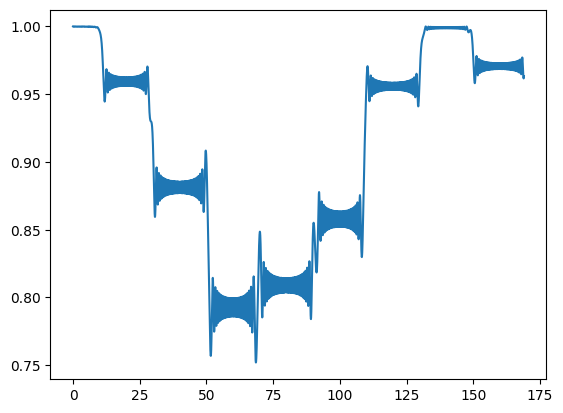

In [ ]:
from pylab import *
plot(tlist, output.expect[2])
show()

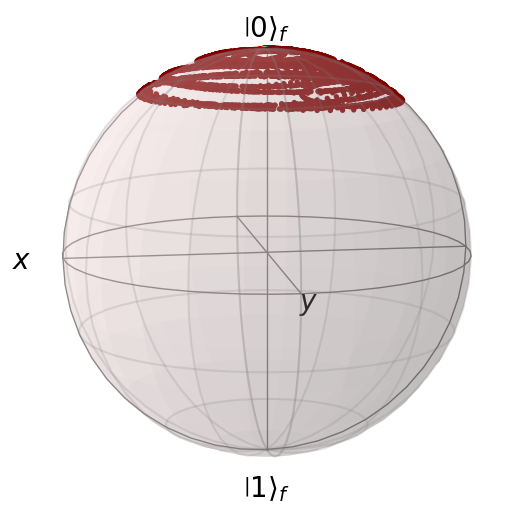

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
b=Bloch()
## normalize colors to times in tlist ##
nrm=mpl.colors.Normalize(-2,10)
colors=cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output.expect[0],output.expect[1],output.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
## plot sphere ##
b.show()

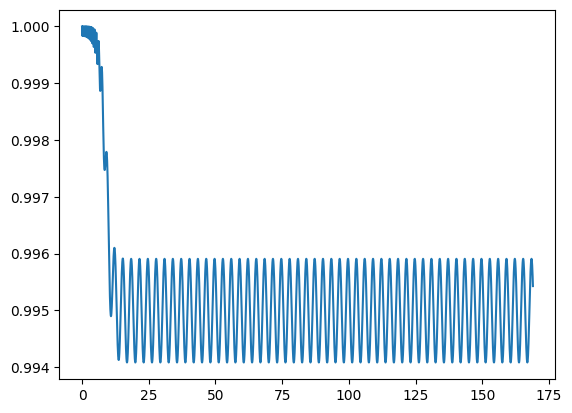

In [ ]:
from qutip import *
import numpy as np

pi = 3.1416

epsilon = 0.1
delta = 1.0

psi0 = basis(2,0)


H0 = -delta * sigmaz() - epsilon * sigmax()
H1 = -sigmaz()

def H1_coeff(t, args):
  A = args["A"]
  return A* np.exp(-(t / 5.) ** 2)

h_t = [H0, [H1, H1_coeff]]
args = {'A':10.012, "w": 0.025*2*pi}


c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist = np.linspace(0, 169, 5999)
output = mesolve(h_t, psi0, tlist, c_ops, e_ops, args)

from pylab import *
plot(tlist, output.expect[2])
show()

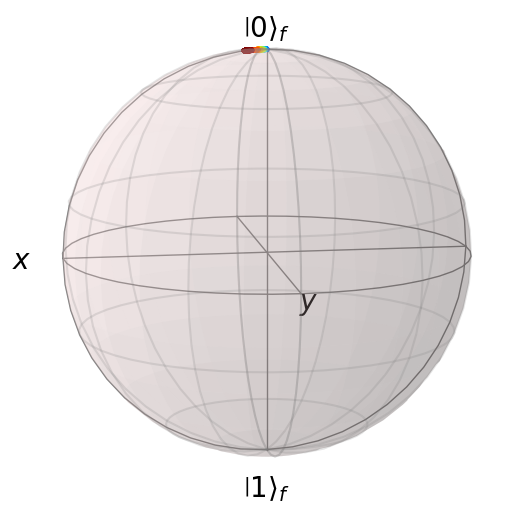

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
b=Bloch()
## normalize colors to times in tlist ##
nrm=mpl.colors.Normalize(-2,10)
colors=cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output.expect[0],output.expect[1],output.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
## plot sphere ##
b.show()

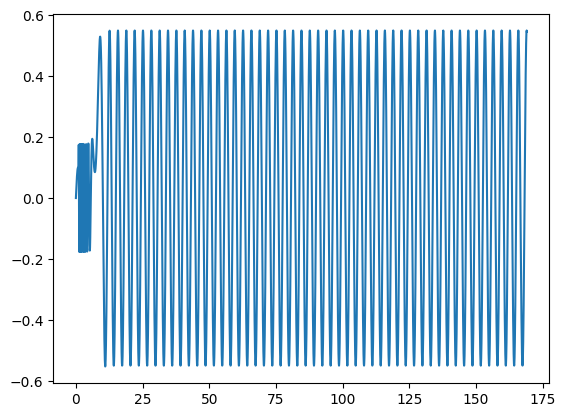

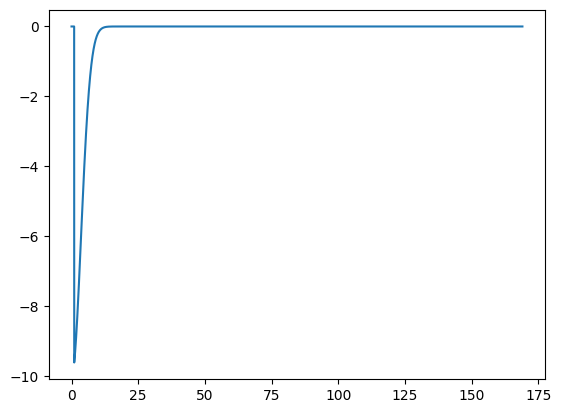

In [ ]:
from qutip import *
import numpy as np

pi = 3.1416

epsilon = 0.1
delta = 1.0

psi0 = basis(2,0)


H0 = -delta * sigmaz() - epsilon * sigmax()
H1 = -sigmaz()

def H1_coeff(t, args):
  A = args["A"]
  return -A* np.exp(-(t / 5.) ** 2) * np.heaviside(t-1, 0.5)

h_t = [H0, [H1, H1_coeff]]
args = {'A':10.012, "w": 0.025*2*pi}


c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist = np.linspace(0, 169, 5999)
output = mesolve(h_t, psi0, tlist, c_ops, e_ops, args)

from pylab import *
plot(tlist, output.expect[1])
show()
plot(tlist, H1_coeff(tlist, args))
show()

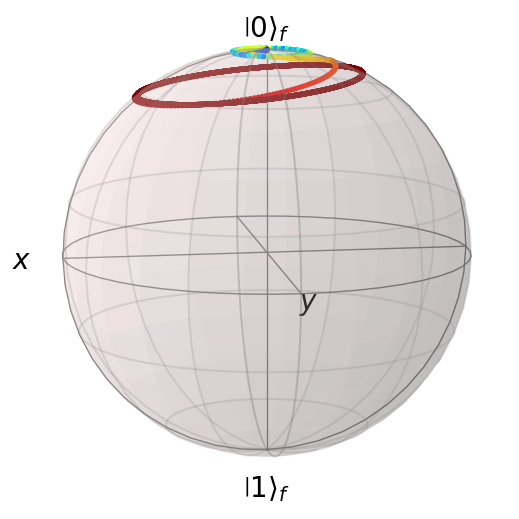

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
b=Bloch()
## normalize colors to times in tlist ##
nrm=mpl.colors.Normalize(-2,10)
colors=cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output.expect[0],output.expect[1],output.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
## plot sphere ##
b.show()

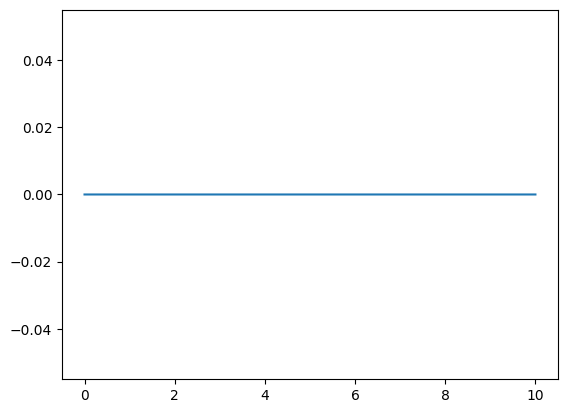

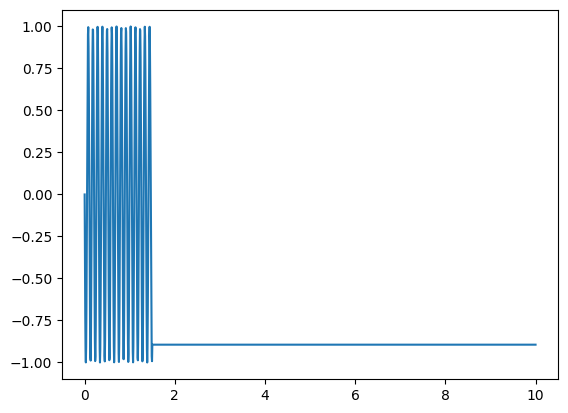

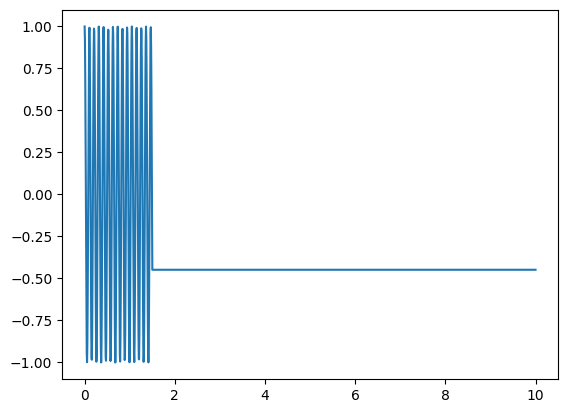

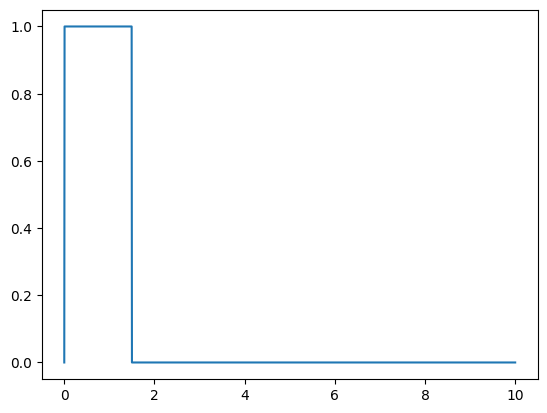

In [ ]:
from qutip import *
import numpy as np

psi0 = basis(2,0)


H1= 30*sigmax()

def H1_coeff(t, args):
  A = args["A"]
  return  np.heaviside(t-0, 0.0) * np.heaviside(-(t-1.5), 0.0)

h_t = [H1, H1_coeff]
args = {'A':10.012, "w": 0.025*2*pi}


c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = linspace(0, 10.0, 1500)
output = mesolve(h_t, psi0, tlist, c_ops, e_ops, args)

from pylab import *
plot(tlist, output.expect[0])
show()
plot(tlist, output.expect[1])
show()
plot(tlist, output.expect[2])
show()
plot(tlist, H1_coeff(tlist, args))
show()

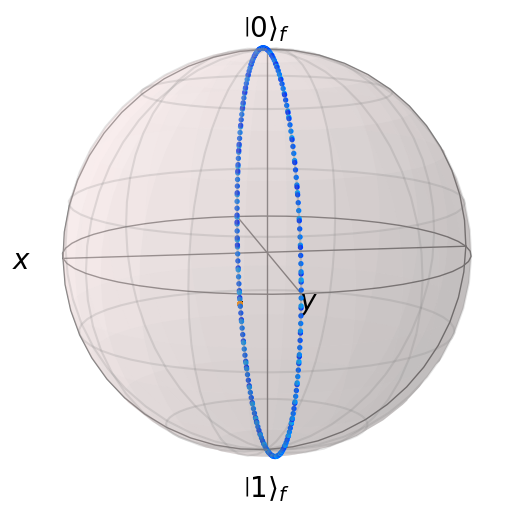

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
b=Bloch()
## normalize colors to times in tlist ##
nrm=mpl.colors.Normalize(-2,10)
colors=cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output.expect[0],output.expect[1],output.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
## plot sphere ##
b.show()